In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
co2_data_raw = pd.read_csv('../data/co2_gdp_data/owid-co2-data.csv')

In [3]:
co2_data = (
    co2_data_raw
    .assign(
        year = pd.to_datetime(co2_data_raw['year'], format='%Y').dt.date,
        gdp_per_capita = co2_data_raw['gdp'].div(co2_data_raw['population']).round(2).astype('float'),
        year_col = pd.to_datetime(co2_data_raw['year'], format='%Y').dt.year.astype('string')
    )
    .fillna(0)
)

In [4]:
gdppc_growth_inter = (
    co2_data
    [(co2_data['year'] == datetime.date(year=1980, month=1, day=1)) | (co2_data['year'] == datetime.date(year=2018, month=1, day=1))]
    .query('gdp_per_capita > 0')
    .pivot_table(index='country', columns='year_col', values='gdp_per_capita')
    .reset_index()
    .set_index('country')
)

(
    gdppc_growth_inter
    .assign(
        pct_change = gdppc_growth_inter['2018'].div(gdppc_growth_inter['1980'], fill_value=0).sub(1).fillna(0).round(4)
    )
    .replace([np.inf, -np.inf], np.nan).dropna(subset=["pct_change"], how="all")
    .sort_values(['2018','pct_change'], ascending=False)
    .head(20)
    .style
    .background_gradient(cmap='RdBu')
)

year_col,1980,2018,pct_change
country,,,
Qatar,39156.180000,144809.040000,2.698200
Norway,24030.070000,84584.310000,2.519900
United Arab Emirates,43568.110000,80403.980000,0.845500
Singapore,13675.590000,70536.900000,4.157900
Ireland,13652.560000,65016.290000,3.762200
Kuwait,19396.510000,64189.240000,2.309300
Switzerland,27692.460000,62478.770000,1.256200
Luxembourg,24995.930000,57598.130000,1.304300
United States,30219.630000,54617.460000,0.807400


In [5]:
gdp_growth_inter = (
    co2_data
    [(co2_data['year'] == datetime.date(year=1980, month=1, day=1)) | (co2_data['year'] == datetime.date(year=2018, month=1, day=1))]
    .query('gdp_per_capita > 0')
    .pivot_table(index='country', columns='year_col', values='gdp')
    .reset_index()
    .set_index('country')
)

(
    gdp_growth_inter
    .assign(
        pct_change = gdp_growth_inter['2018'].div(gdp_growth_inter['1980'], fill_value=0).sub(1).fillna(0).round(4)
    )
    .replace([np.inf, -np.inf], np.nan).dropna(subset=["pct_change"], how="all")
    .sort_values(['2018','pct_change'], ascending=False)
    .head(20)
    .style
    .background_gradient(cmap='RdBu')
)

year_col,1980,2018,pct_change
country,,,
World,31880978104320.000000,113630171365376.000000,2.564200
China,1893783568384.000000,18151620214784.000000,8.584800
United States,6743208230912.000000,18140645818368.000000,1.690200
India,1015104995328.000000,8835757506560.000000,7.704300
Japan,2500143611904.000000,4867010592768.000000,0.946700
Germany,1761467957248.000000,3885961314304.000000,1.206100
Russia,1696830062592.000000,3613410459648.000000,1.129500
Indonesia,439667523584.000000,3075456106496.000000,5.995000
Brazil,1014791995392.000000,2965401501696.000000,1.922200


In [6]:
pop_growth_inter = (
    co2_data
    [(co2_data['year'] == datetime.date(year=1980, month=1, day=1)) | (co2_data['year'] == datetime.date(year=2018, month=1, day=1))]
    .query('gdp_per_capita > 0')
    .pivot(index='country', columns='year_col', values='population')
    .reset_index()
    .set_index('country')
)

(
    pop_growth_inter
    .assign(
        pct_change = pop_growth_inter['2018'].div(pop_growth_inter['1980'], fill_value=0).sub(1).fillna(0).round(4)
    )
    .replace([np.inf, -np.inf], np.nan).dropna(subset=["pct_change"], how="all")
    .sort_values(['2018','pct_change'], ascending=False)
    .head(20)
    .style
    .background_gradient(cmap='RdBu')
)


year_col,1980,2018,pct_change
country,,,
World,4444007936.000000,7683789824.000000,0.729000
China,982372480.000000,1417069440.000000,0.442500
India,696828352.000000,1369003264.000000,0.964600
United States,223140016.000000,332140032.000000,0.488500
Indonesia,148177104.000000,267066848.000000,0.802300
Pakistan,80624056.000000,219731488.000000,1.725400
Brazil,122288384.000000,210166592.000000,0.718600
Nigeria,72951440.000000,198387616.000000,1.719400
Bangladesh,83929768.000000,163683952.000000,0.950200


In [7]:
gdppc_top_econ = (
    co2_data
    [(co2_data['year'] >= datetime.date(year=1980, month=1, day=1)) & (co2_data['year'] <= datetime.date(year=2018, month=1, day=1))]
    .groupby(['year'])
    .agg(
        USA = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'USA'].sum()),
        DEU = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'DEU'].sum()),
        GBR = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'GBR'].sum()),
        FRA = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'FRA'].sum()),
        JPN = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'JPN'].sum()),
        
        CHN = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'CHN'].sum()),
        IND = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'IND'].sum()),
        IDN = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'IDN'].sum()),
        BRA = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'BRA'].sum()),
        NGA = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'NGA'].sum()),
        
        MYS = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'MYS'].sum()),
        VNM = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'VNM'].sum()),
        
        KOR = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'KOR'].sum()),
        TWN = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'TWN'].sum()),
        HKG = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'HKG'].sum()),
        SGP = pd.NamedAgg('gdp_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'SGP'].sum()),
    )
)

gdppc_base_index = gdppc_top_econ.iloc[0,:]

gdppc_index_top_econ = (
    gdppc_top_econ
    .div(gdppc_base_index, axis='columns')
    .mul(100)
    .assign(metric='gdp_per_capita')
)

In [8]:
co2pc_top_econ = (
    co2_data
    [(co2_data['year'] >= datetime.date(year=1980, month=1, day=1)) & (co2_data['year'] <= datetime.date(year=2018, month=1, day=1))]
    .groupby(['year'])
    .agg(
        USA = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'USA'].sum()),
        DEU = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'DEU'].sum()),
        GBR = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'GBR'].sum()),
        FRA = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'FRA'].sum()),
        JPN = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'JPN'].sum()),
        
        CHN = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'CHN'].sum()),
        IND = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'IND'].sum()),
        IDN = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'IDN'].sum()),
        BRA = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'BRA'].sum()),
        NGA = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'NGA'].sum()),
        
        MYS = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'MYS'].sum()),
        VNM = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'VNM'].sum()),
        
        KOR = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'KOR'].sum()),
        TWN = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'TWN'].sum()),
        HKG = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'HKG'].sum()),
        SGP = pd.NamedAgg('co2_per_capita', aggfunc=lambda s: s[co2_data['iso_code'] == 'SGP'].sum()),
    )
)

co2pc_base_index = co2pc_top_econ.iloc[0,:]

co2pc_index_top_econ = (
    co2pc_top_econ
    .div(co2pc_base_index, axis='columns')
    .mul(100)
    .assign(metric='co2_per_capita')
)

In [9]:
combine = pd.concat([gdppc_index_top_econ, co2pc_index_top_econ])
combine.head()

,USA,DEU,GBR,FRA,JPN,CHN,IND,IDN,BRA,NGA,MYS,VNM,KOR,TWN,HKG,SGP,metric
year,,,,,,,,,,,,,,,,,
1980-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,gdp_per_capita
1981-01-01,101.359183,100.514024,98.576925,100.461845,102.503135,101.428594,103.752875,104.403171,93.509553,89.237382,104.329277,101.062074,105.625717,104.433724,107.239226,108.397663,gdp_per_capita
1982-01-01,98.433833,99.753454,100.010239,102.413371,105.003305,108.948682,104.645272,98.266367,92.115180,85.920002,107.700721,106.603650,112.406528,106.439464,108.543127,113.591589,gdp_per_capita
1983-01-01,101.492871,101.584245,103.462382,103.089844,106.821483,114.855507,110.664150,99.898220,87.451602,78.200074,111.303922,109.714711,125.224670,113.719407,113.187930,120.528694,gdp_per_capita
1984-01-01,107.776336,104.443792,105.922701,104.124803,110.385244,125.886387,112.378239,104.492144,90.174673,72.799077,116.736974,116.717047,136.226462,123.979804,122.962275,128.161125,gdp_per_capita


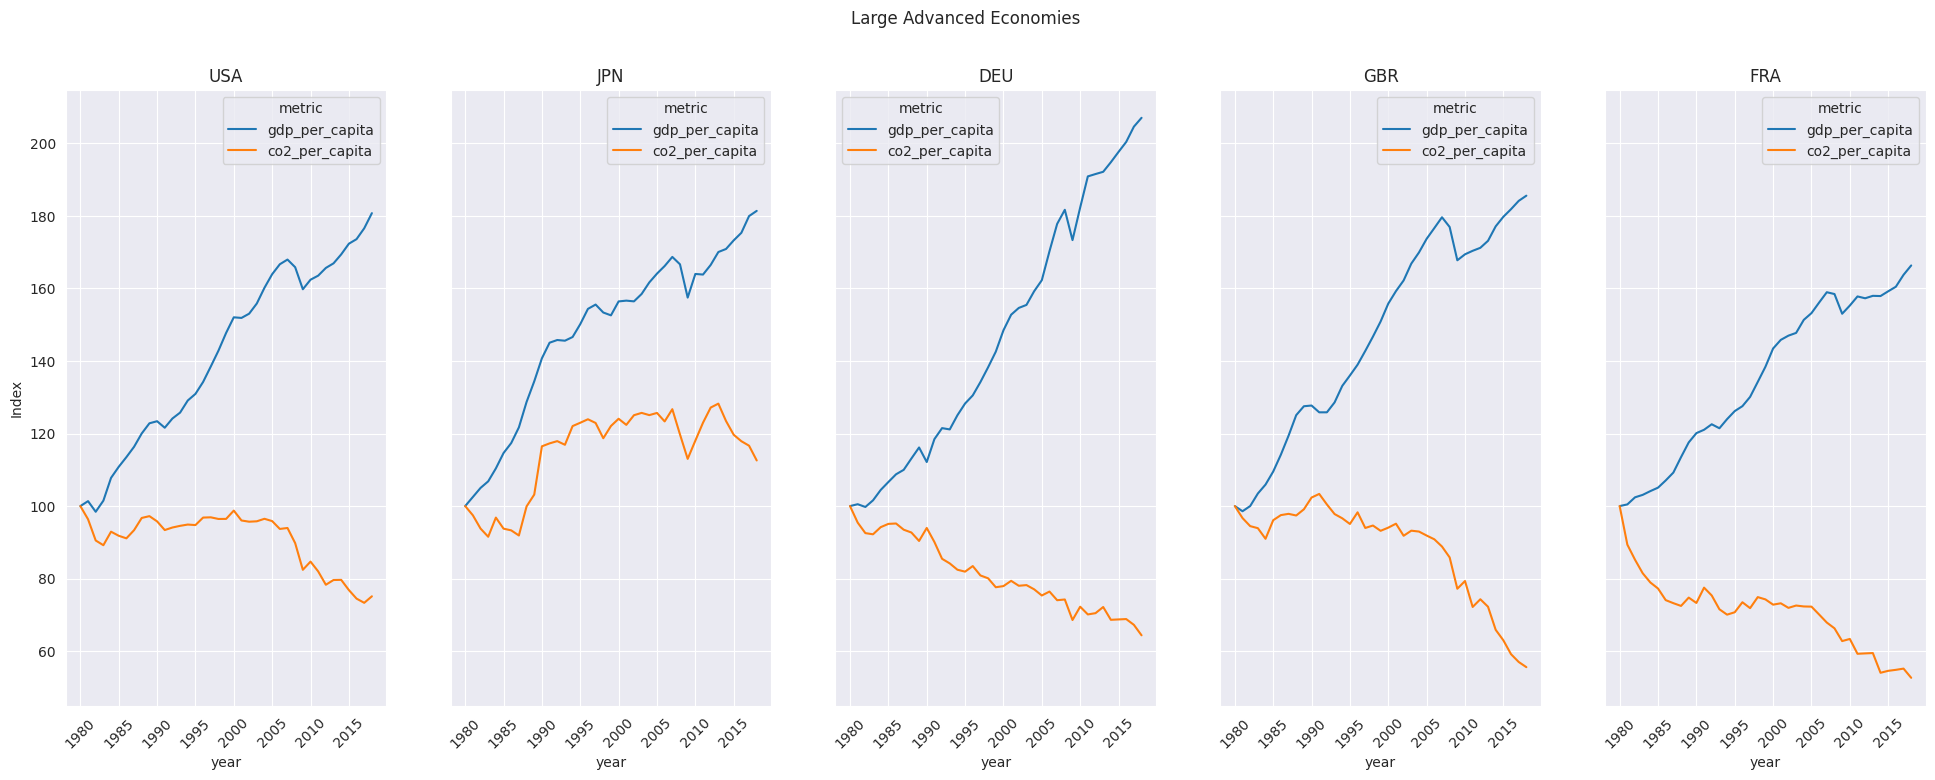

In [10]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(24,8))
fig.suptitle("Large Advanced Economies")

for idx, code in enumerate(['USA', 'JPN', 'DEU', 'GBR', 'FRA']):
    sns.lineplot(ax=axes[idx], data=combine, y=code, x='year', hue='metric')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel('Index')
    axes[idx].set_title(code)

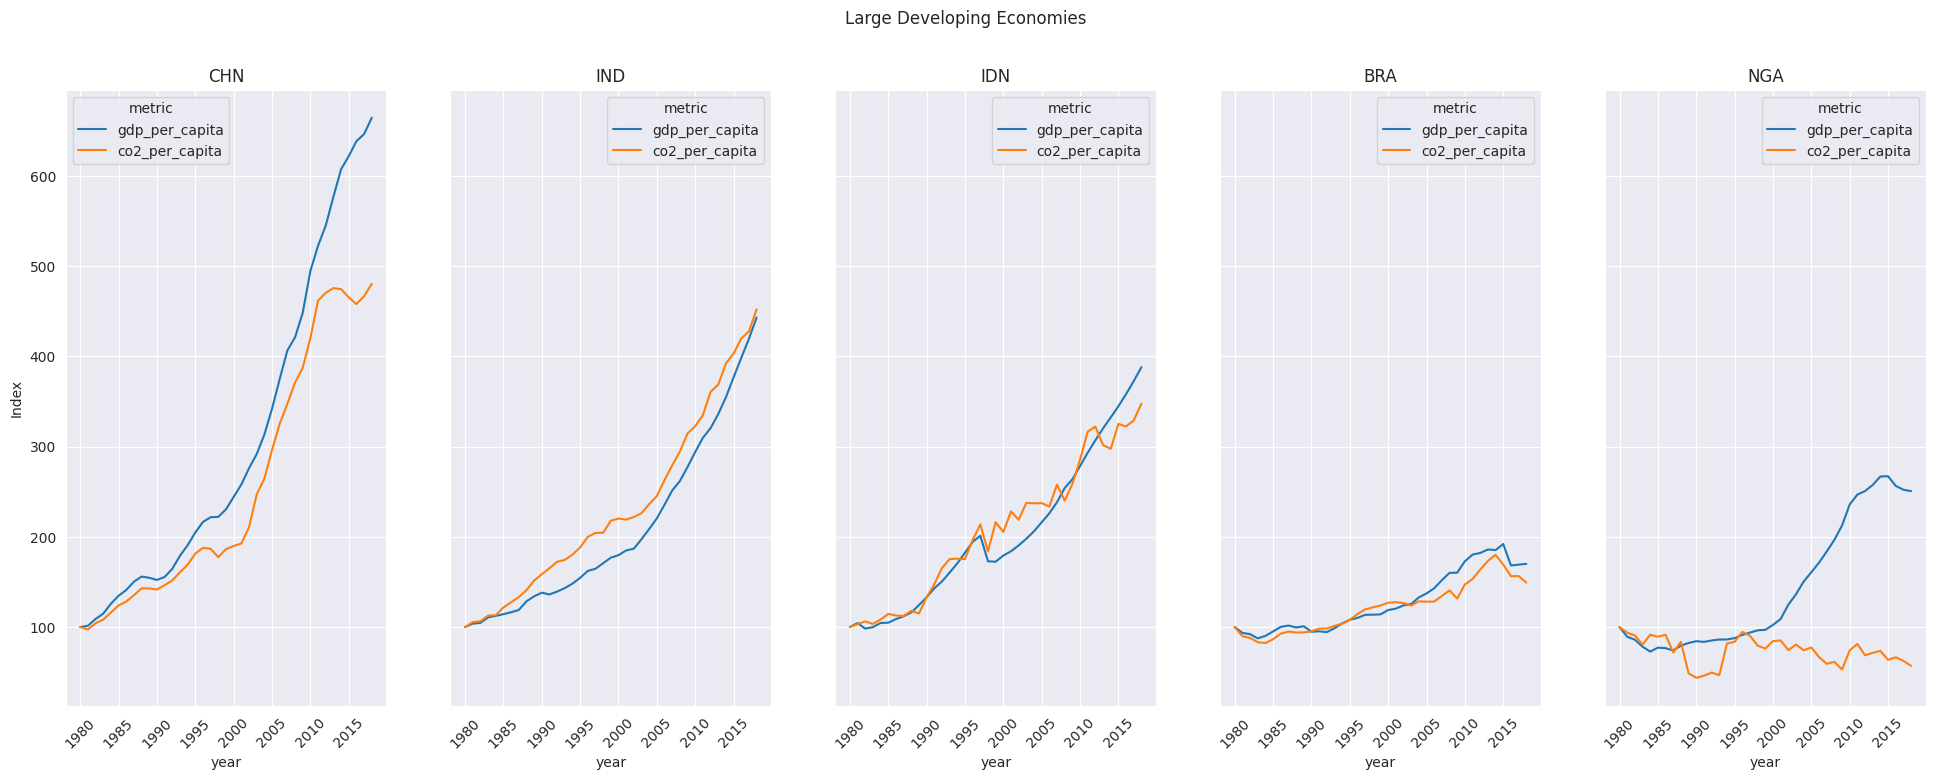

In [11]:
fig, axes = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(24,8))
fig.suptitle("Large Developing Economies")

for idx, code in enumerate(['CHN', 'IND', 'IDN', 'BRA', 'NGA']):
    sns.lineplot(ax=axes[idx], data=combine, y=code, x='year', hue='metric')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel('Index')
    axes[idx].set_title(code)

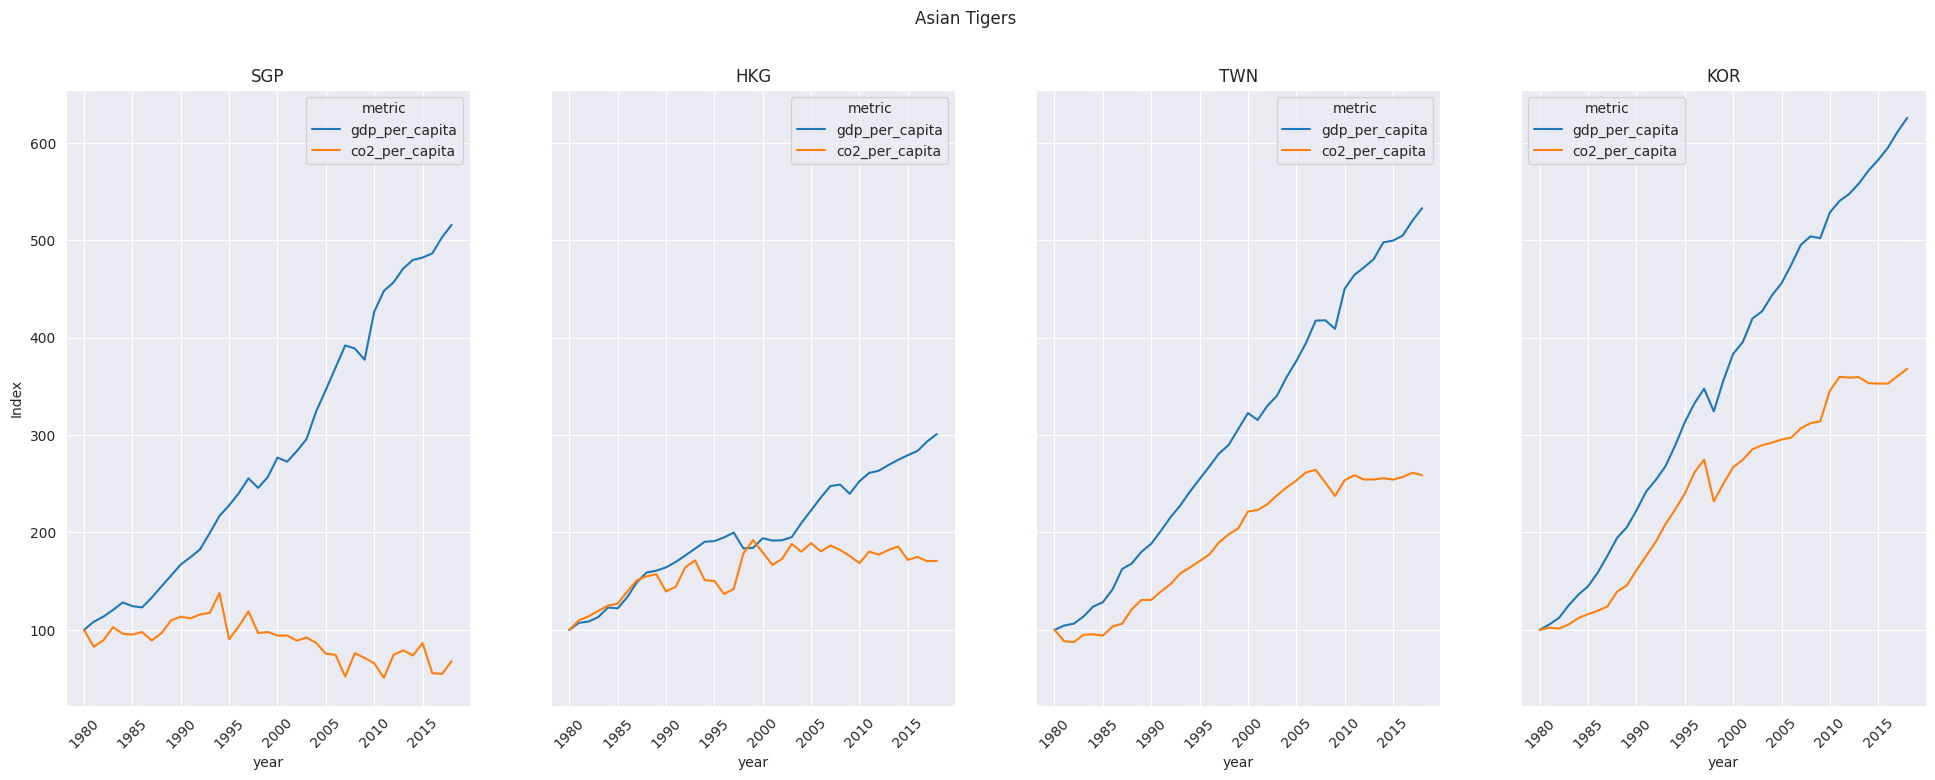

In [12]:
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(24,8))
fig.suptitle("Asian Tigers")

for idx, code in enumerate(['SGP', 'HKG', 'TWN', 'KOR']):
    sns.lineplot(ax=axes[idx], data=combine, y=code, x='year', hue='metric')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel('Index')
    axes[idx].set_title(code)